## **Customer Segmentation using K-Means Clustering**


In [1]:
# Importing the Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [79]:
# Loading the dataset.

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Machine Learning/Mall_Customers.csv")

In [80]:
# Top 5 rows of dataset.
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
# Shape of dataset
df.shape

(200, 5)

In [82]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [83]:
# Check null's in dataset
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Gender'>

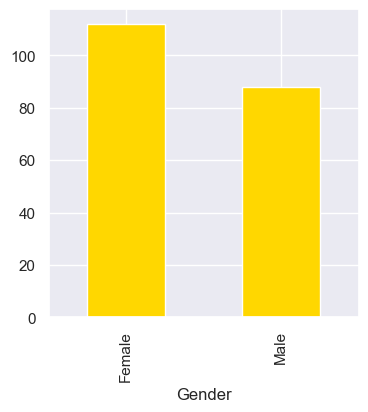

In [84]:
df['Gender'].value_counts().plot(kind = 'bar', color = 'gold', figsize = (4,4))

In [ ]:
## Drop customerid.

df = df.drop('CustomerID', axis=1)

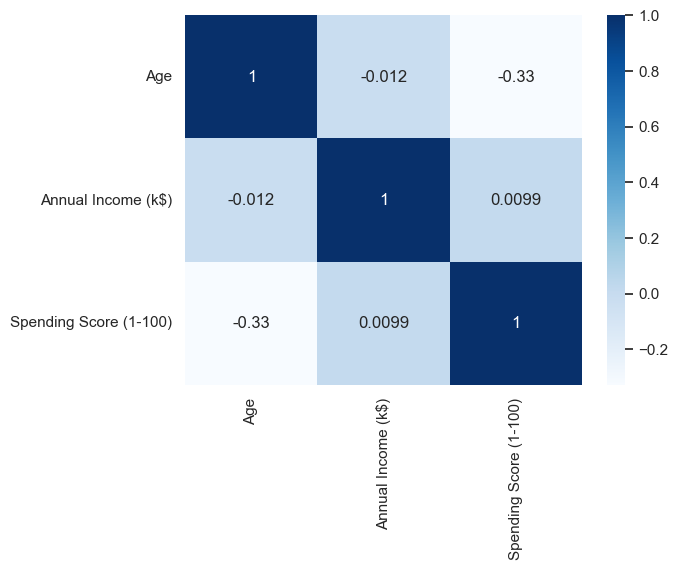

In [ ]:
# Correlation Metrix of numerical values.
sns.heatmap(df.corr(numeric_only = True), cmap = 'Blues', annot = True)
plt.show()

In [16]:
## Choosing the Annual Income Column & Spending Column

X = df.iloc[:, [3,4]].values

In [ ]:
# Check X
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Choosing the number of clusters.

#### WCSS --> Within Cluster Sum of Square.

In [56]:
## -- Finding WCSS value for different number of cluster.

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit_predict(X)


    wcss.append(kmeans.inertia_)

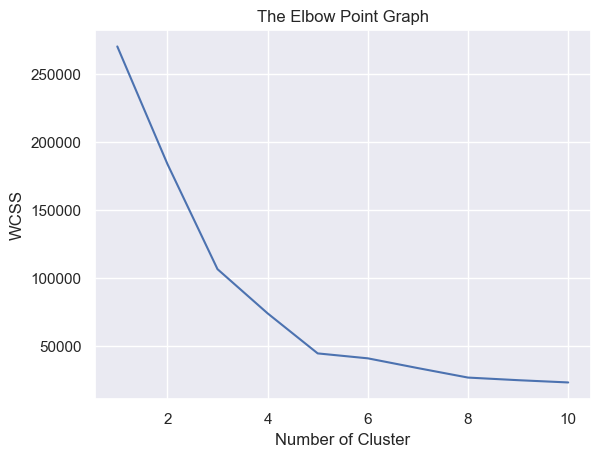

In [57]:
## Ploting an elbow graph

sns.set()
plt.Figure(figsize=(4,4))
sns.lineplot(x = range(1,11),y = wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Optimum number of Clusters = 5
# Traing the K-Means Clustering Model

kmean = KMeans(n_clusters=5, init="k-means++", random_state=0)

# Return a label for each data point based on their cluster
Y = kmean.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

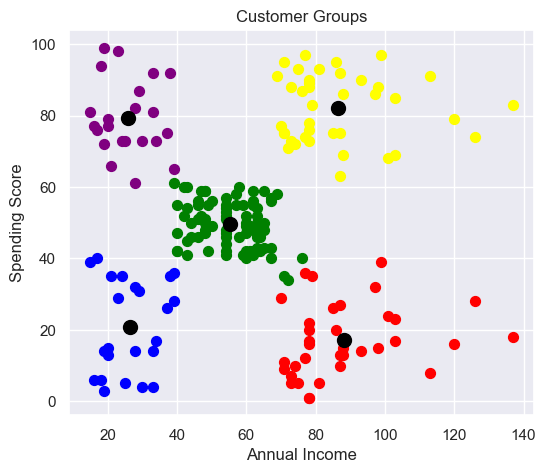

In [89]:
## Visualizing all the clusters.
# n_cluster = 5 

# Plotting all the clusters and thire Centroids.

plt.figure(figsize=(6,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'purple', label = 'Cluster 1')

# plot the centroids

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s = 100, c = 'Black', label = 'Centoids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()